In [1]:
import pandas as pdsss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing Input data
data_cohesion_load = np.load('Inputs/4ft_cohesion.npy')
data_friction_load = np.load('Inputs/4ft_friction.npy')
data_poly_load = np.load('Inputs/4ft_poly_feature.npy')
data_watertable_load = np.load('Inputs/4ft_water_table.npy')
data_pos = np.load('Inputs/4ft_positions.npy')

In [3]:
print(np.shape(data_cohesion_load))
print(np.shape(data_friction_load))
print(np.shape(data_poly_load))
print(np.shape(data_watertable_load))

(25, 131072)
(25, 131072)
(25, 131072)
(1, 131072)


In [4]:
data_cohesion = data_cohesion_load
data_friction = data_friction_load
data_poly = data_poly_load
data_watertable = data_watertable_load

In [5]:
# Importing Target data
data_failure_depth = np.load('Targets/4ft_failure_depths.npy')
data_velocity_plot = np.load('Targets/4ft_velocity_plots.npy')

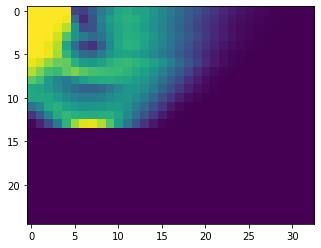

In [6]:
# Loading the velocity plots
plt.imshow(data_velocity_plot[:,:,100])

In [7]:
# Generating equaly spaced quad nodes 
cord_x = []
cord_z = []
for i in range(len(data_pos)):
    temp_z = data_pos[:,:,1][i][0]
    cord_z.append(temp_z)
cord_z = np.array(cord_z)
z_node = cord_z
x_node = cord_x
for i in range(len(data_pos[:,:,0][0])):
    temp_x = data_pos[:,:,0][0][i]
    cord_x.append(temp_x)
cord_x = np.array(cord_x)
nodes = len(x_node)*len(z_node)
cord = np.zeros((nodes,2))
for i in range(len(x_node)):
    cord[(len(z_node))*i:((len(z_node))+((len(z_node))*i)),0] = x_node[i]
for k in range(len(x_node)):
    cord[(len(z_node))*k:((len(z_node))*(k+1)),1] = z_node

In [8]:
data_cohesion_upd = np.zeros(((len(z_node)*len(x_node)),len(data_cohesion[0,:])))
data_friction_upd = np.zeros(((len(z_node)*len(x_node)),len(data_cohesion[0,:])))
data_poly_upd = np.zeros(((len(z_node)*len(x_node)),len(data_cohesion[0,:])))
data_watertable_upd = np.zeros(((len(z_node)*len(x_node)),len(data_cohesion[0,:])))

In [9]:
print(np.shape(data_cohesion_upd))
print(np.shape(data_friction_upd))
print(np.shape(data_poly_upd))
print(np.shape(data_watertable_upd))

(825, 131072)
(825, 131072)
(825, 131072)
(825, 131072)


In [10]:
for j in range(len(data_cohesion[0,:])):
    for i in range(len(z_node)):
        data_cohesion_upd[i,j] = data_cohesion[i,j]
        data_friction_upd[i,j] = data_friction[i,j]
        data_poly_upd[i,j] = data_poly[i,j]
        data_watertable_upd[:,j] = data_watertable[:,j]

In [11]:
for j in range(len(data_cohesion[0,:])):
    for i in range(1,len(z_node)):
        data_cohesion_upd[len(z_node)*i:(len(z_node)+(len(z_node)*i)),j] = data_cohesion_upd[(len(z_node)*(i-1)):len(z_node)*i,j]
        data_friction_upd[len(z_node)*i:(len(z_node)+(len(z_node)*i)),j] = data_friction_upd[(len(z_node)*(i-1)):len(z_node)*i,j]
        data_poly_upd[len(z_node)*i:(len(z_node)+(len(z_node)*i)),j] = data_poly_upd[(len(z_node)*(i-1)):len(z_node)*i,j]

In [12]:
W = []
for j in range(len(data_cohesion[0,:])):
    temp = data_velocity_plot[:,:,j].reshape(825)
    W.append(temp)
W = np.array(W)
data_velocity_upd = np.reshape(W,((len(z_node)*len(x_node)),len(data_cohesion[0,:])))

In [13]:
df_temp = []
for i in range(len(data_cohesion[0,:])):
    temp = pd.DataFrame({'X':cord[:,0], 'Y': cord[:,1], 'cohesion': data_cohesion_upd[:,i], 'friction': data_friction_upd[:,i], 'water_table': data_watertable_upd[:,i],'poly': data_poly_upd[:,i], 'data_velo':data_velocity_upd[:,i]})
    df_temp.append(temp)

In [14]:
df_global = pd.concat(df_temp)

In [15]:
df_global

,X,Y,cohesion,friction,water_table,poly,data_velo
0,0.0000,0.0000,0.000000,37.616298,0.996700,150936.172478,4.493636e-04
1,0.0000,-0.1524,119892.829881,0.000000,0.996700,0.000000,8.446436e-09
2,0.0000,-0.3048,354377.270582,0.000000,0.996700,0.000000,3.288957e-09
3,0.0000,-0.4572,0.000000,32.618818,0.996700,79795.509838,1.969263e-09
4,0.0000,-0.6096,0.000000,28.809563,0.996700,45949.557368,4.682624e-08
...,...,...,...,...,...,...,...
820,4.8768,-3.0480,0.000000,0.000000,1.541934,0.000000,2.298608e-07
821,4.8768,-3.2004,0.000000,0.000000,1.541934,0.000000,2.426088e-04
822,4.8768,-3.3528,0.000000,0.000000,1.541934,0.000000,6.600684e-08
823,4.8768,-3.5052,0.000000,0.000000,1.541934,0.000000,7.499301e-04


In [16]:
data_x = df_global.iloc[:,:-1].values
data_y = df_global.iloc[:,-1].values

In [17]:
# Spliting test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state = 42)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
import tensorflow as tf
print(tf.__version__)
# Part 2:Building an ANN using keras
#Initializing ANN
ann = tf.keras.models.Sequential([tf.keras.layers.Dense(units = 18,activation = 'relu'),
                                  tf.keras.layers.Dense(units = 15, activation = 'relu'),  
                                  tf.keras.layers.Dense(units = 1, activation = 'linear')
])

2.9.1


In [20]:
#compling ann
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = 'accuracy')

In [21]:
#traing the model
ann.fit(x_train,y_train,batch_size = 128, epochs = 20)

Epoch 1/20
760320/760320 [==============================] - 1091s 1ms/step - loss: 4.2821e-06 - accuracy: 0.0400
Epoch 2/20
760320/760320 [==============================] - 1085s 1ms/step - loss: 8.8431e-09 - accuracy: 0.0400
Epoch 3/20
760320/760320 [==============================] - 1085s 1ms/step - loss: 8.8359e-09 - accuracy: 0.0400
Epoch 4/20
760320/760320 [==============================] - 1090s 1ms/step - loss: 8.8414e-09 - accuracy: 0.0400
Epoch 5/20
760320/760320 [==============================] - 1088s 1ms/step - loss: 8.8429e-09 - accuracy: 0.0400
Epoch 6/20
760320/760320 [==============================] - 1087s 1ms/step - loss: 8.8446e-09 - accuracy: 0.0400
Epoch 7/20
760320/760320 [==============================] - 1084s 1ms/step - loss: 8.8460e-09 - accuracy: 0.0400
Epoch 8/20
760320/760320 [==============================] - 1091s 1ms/step - loss: 8.8520e-09 - accuracy: 0.0400
Epoch 9/20
760320/760320 [==============================] - 1085s 1ms/step - loss: 8.8465e-09 - 

In [22]:
ann.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000024247632160>>

In [23]:
ann_prediction = ann.predict(x_test)

337920/337920 [==============================] - 335s 990us/step


In [24]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,ann_prediction)
r2score

-0.356644384812278

In [25]:
ann.save("ann_epoch_11.h5")
# import tensorflow as tf
# from tensorflow import keras
# ann_load = keras.models.load_model("ann.h5")

In [26]:
data_cohesion_out = data_cohesion_load[:,1000]
data_friction_out = data_friction_load[:,1000]
data_watertable_out = data_watertable_load[:,1000]
data_poly_out = data_poly_load[:,1000]

In [27]:
data_cohesion_upd1 = np.zeros(((len(z_node)*len(x_node)),1))
data_friction_upd1 = np.zeros(((len(z_node)*len(x_node)),1))
data_poly_upd1 = np.zeros(((len(z_node)*len(x_node)),1))
data_watertable_upd1 = np.zeros(((len(z_node)*len(x_node)),1))
data_velocity_upd1 = data_velocity_plot[:,:,1000].reshape(len(x_node)*len(z_node),1)

In [28]:
for i in range(len(x_node)*len(z_node)):
    data_watertable_upd1[i] = data_watertable_out
for k in range(len(x_node)):
    data_cohesion_upd1[(len(z_node))*k:((len(z_node))*(k+1)),0] = data_cohesion_out
    data_friction_upd1[(len(z_node))*k:((len(z_node))*(k+1)),0] = data_friction_out
    data_poly_upd1[(len(z_node))*k:((len(z_node))*(k+1)),0] = data_poly_out

In [29]:
data_cohesion_upd1 = np.squeeze(data_cohesion_upd1)
data_friction_upd1 = np.squeeze(data_friction_upd1)
data_poly_upd1 = np.squeeze(data_poly_upd1)
data_watertable_upd1 = np.squeeze(data_watertable_upd1)
df_out = pd.DataFrame({'X':cord[:,0],'Y': cord[:,1],'cohesion': data_cohesion_upd1, 'friction': data_friction_upd1, 'poly': data_poly_upd1, 'watertable': data_watertable_upd1 })

In [30]:
df_out

,X,Y,cohesion,friction,poly,watertable
0,0.0000,0.0000,228254.925930,0.000000,0.000000,3.642487
1,0.0000,-0.1524,61651.890298,0.000000,0.000000,3.642487
2,0.0000,-0.3048,0.000000,28.216281,42440.836106,3.642487
3,0.0000,-0.4572,0.000000,33.593326,91571.516725,3.642487
4,0.0000,-0.6096,0.000000,33.528793,90754.951024,3.642487
...,...,...,...,...,...,...
820,4.8768,-3.0480,300835.668686,0.000000,0.000000,3.642487
821,4.8768,-3.2004,300835.668686,0.000000,0.000000,3.642487
822,4.8768,-3.3528,300835.668686,0.000000,0.000000,3.642487
823,4.8768,-3.5052,300835.668686,0.000000,0.000000,3.642487


In [31]:
output_100 = ann.predict(sc.transform(df_out.values.tolist()))

26/26 [==============================] - 0s 1ms/step


In [32]:
output_100

array([[-1.61257340e-05],
       [-1.61257340e-05],
       [ 1.44692581e+02],
       [ 3.12230133e+02],
       [ 3.09448029e+02],
       [ 4.82484985e+02],
       [ 1.61644806e+02],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [ 4.87500732e+02],
       [ 1.64783234e+02],
       [ 3.96349854e+02],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [ 1.44694778e+02],
       [ 3.12232330e+02],
       [ 3.09450256e+02],
       [ 4.82487152e+02],
       [ 1.61646988e+02],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [-1.61257340e-05],
       [ 4.87502899e+02],
       [ 1.64785446e+02],
       [ 3.96352081e+02],
       [-1.6

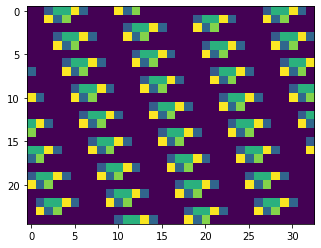

In [33]:
pl = np.reshape(output_100,(len(z_node),len(x_node)))
plt.imshow(pl)

In [34]:
pl

array([[-1.61257340e-05, -1.61257340e-05,  1.44692581e+02,
         3.12230133e+02,  3.09448029e+02,  4.82484985e+02,
         1.61644806e+02, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05,  4.87500732e+02,  1.64783234e+02,
         3.96349854e+02, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
         1.44694778e+02,  3.12232330e+02,  3.09450256e+02,
         4.82487152e+02,  1.61646988e+02, -1.61257340e-05],
       [-1.61257340e-05, -1.61257340e-05,  4.87502899e+02,
         1.64785446e+02,  3.96352081e+02, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-05,
        -1.61257340e-05, -1.61257340e-05, -1.61257340e-

In [35]:
plt.imshow(data_velocity_plot[:,:,234100])

IndexError: index 234100 is out of bounds for axis 2 with size 131072

In [ ]:
data_velocity_plot[:,:,234100]

In [ ]:
print(ann.layers[0].weights)
